<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/ResNet50PretrainedKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50v2 Keras Pretrained Model


In [3]:
# Imports
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt






In [4]:
# Load the pretrained ResNet50 model
model = ResNet50(weights='imagenet')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
# Prediction Function
def predict_image(mode, image_path):
  """
  Predicts the class of the given image using the ResNet50 pretrained model.

  Args:
      model: Pre-trained ResNet50 model.
      image_path: Path to the image file.

  Returns:
    Top predictions as a list of (class, description, score).
  """
  # Load the image with required target (image_path) and target size for ResNet50
  img= load_img(image_path, target_size = (224,224))

  # Convert the image to numpy array using img_to_array
  img_array = img_to_array(img)

  # Add a batch dimension (1,223, 224,3)
  img_array = np.expand_dims(img_array, axis=0)

  # Preprocess the image for ResNet50
  img_array = preprocess_input(img_array)

  # Predict the image class
  predictions = model.predict(img_array)

  # Decode the predictions into readable labels
  decoded_predictions = decode_predictions(predictions, top=5) # Top 5 predictions

  return decoded_predictions[0]



In [7]:
import requests
def download_image(url, save_path):
  """ Download and image from a given url and save it to a path."""
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    with open(save_path, 'wb') as out_file:
      for chunk in response.iter_content(chunk_size=8192):
        out_file.write(chunk)
    print(f"Image downloaded successfully to {save_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

In [10]:
download_image("https://images.unsplash.com/photo-1526095179574-86e545346ae6?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1167", 'zebra.jpg')


Image downloaded successfully to zebra.jpg


In [14]:
# Example usage:
image_path = '/content/zebra.jpg'
predictions = predict_image(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


zebra: 0.9989
prairie_chicken: 0.0004
hartebeest: 0.0001
impala: 0.0000
tiger: 0.0000


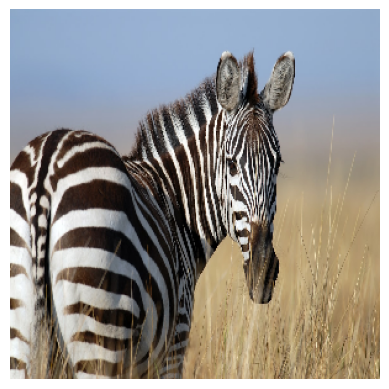

In [19]:
# Display the predictions
for class_name, description, score in predictions:
  print(f"{description}: {score:.4f}")

# Display the image
plt.imshow(load_img(image_path, target_size=(300,300)))
plt.axis('off')
plt.show()

Image downloaded successfully to kangaroo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
coyote: 0.9728
hare: 0.0189
grey_fox: 0.0037
wood_rabbit: 0.0010
timber_wolf: 0.0006


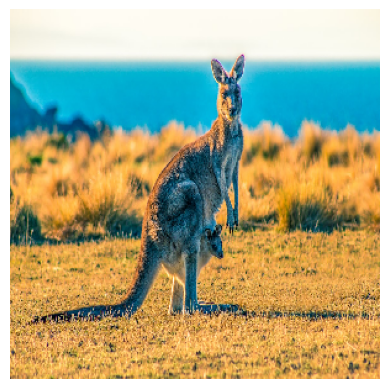

In [22]:
download_image("https://images.unsplash.com/photo-1575699914911-0027c7b95fb6?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1171", "kangaroo.jpg")
# Example usage:
image_path = '/content/kangaroo.jpg'
predictions = predict_image(model, image_path)

# Display the predictions
for class_name, description, score in predictions:
  print(f"{description}: {score:.4f}")

# Display the image
plt.imshow(load_img(image_path, target_size=(300,300)))
plt.axis('off')
plt.show()

Image downloaded successfully to Gibbon.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
gibbon: 1.0000
howler_monkey: 0.0000
indri: 0.0000
spider_monkey: 0.0000
langur: 0.0000


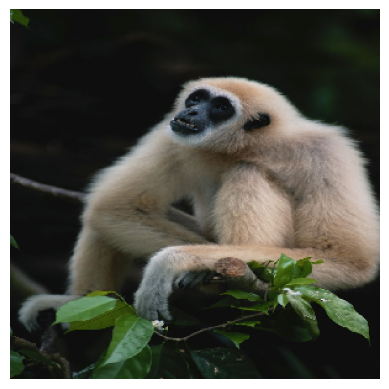

In [23]:
download_image("https://plus.unsplash.com/premium_photo-1664302802571-bd0191256f25?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=687", "Gibbon.jpg")
# Example usage:
image_path = '/content/Gibbon.jpg'
predictions = predict_image(model, image_path)

# Display the predictions
for class_name, description, score in predictions:
  print(f"{description}: {score:.4f}")

# Display the image
plt.imshow(load_img(image_path, target_size=(300,300)))
plt.axis('off')
plt.show()